In [72]:
#LIBRARY
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [73]:
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [74]:
categories=list(data.target_names)
print(categories)
len(categories)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


20

In [75]:
#training the data based on categories
train=fetch_20newsgroups(subset='train',categories=categories)
#testing the data for these categories
test=fetch_20newsgroups(subset='test',categories=categories)
print(len(train))
print(len(test))
#print(train.data[5])

5
5


In [76]:

print(test.data[5])

From: banschbach@vms.ocom.okstate.edu
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: OSU College of Osteopathic Medicine
Lines: 91
Nntp-Posting-Host: vms.ocom.okstate.edu

In article <1rp8p1$2d3@usenet.INS.CWRU.Edu>, esd3@po.CWRU.Edu (Elisabeth S. Davidson) writes:
> 
> In a previous article, banschbach@vms.ocom.okstate.edu () says:
>>least a few "enlightened" physicians practicing in the U.S.  It's really 
>>too bad that most U.S. medical schools don't cover nutrition because if 
>>they did, candida would not be viewed as a non-disease by so many in the 
>>medical profession.
> 
> Case Western Reserve Med School teaches nutrition in its own section as
> well as covering it in other sections as they apply (i.e. B12
> deficiency in neuro as a cause of neuropathy, B12 deficiency in
> hematology as a cause of megaloblastic anemia), yet I sill
> hold the viewpoint of mainstream medicine:  candida can cause
> mucocutaneous candidiasis, and, in already very sick patients
> 

In [77]:
#package for training the model
import sklearn.feature_extraction.text

#importing TfidVectorizer class for Convert a collection of raw documents to a matrix of TF-IDF features. from feature_extraction.text class
#the TFifd converts whatever the text documents into a form of matrix to perform on model 

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
#creating a model on multinomial since its more than 2 features
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
#training the model with train data
model.fit(train.data,train.target)
##train.data is the actual data i.e. news and train.target is the news belongs to which class 
#creating labels for test data
labels=model.predict(test.data)


In [79]:
#accuracy_score
print(accuracy_score(test.target,labels))
#print("labels=",labels)
#print("test-target=",test.target)

0.7738980350504514


accuracy_Score of Decision Tree=54% very low 

accuracy_Score of Logistic regression=82% but still the manuel test results was not accurate as PAC

accuracy_Score of PAC =84% but... the accuracy of manuel test results was not so great comparing to MultinomialNB

accuracy_Score of multinomialNB is =77.38%

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

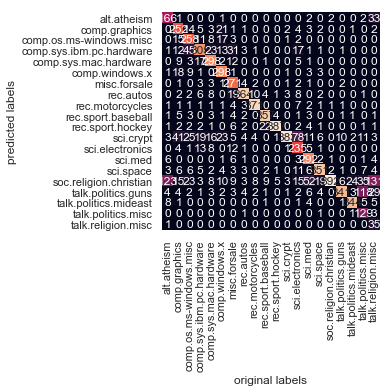

In [80]:
#creating confusion matrix + heat map
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True, annot=True, fmt='d',
            cbar=False,xticklabels=train.target_names,
           yticklabels=train.target_names)
#plot heat map
plt.xlabel('original labels')
plt.ylabel('predicted labels')
print(mat)

In [81]:
#predicting the category of news of new data on the model
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]
#the function returns the category of news based on passed string 's'
#the function passes that with train data and and string to model using pipeline and predict the outcome of that string

#here the "pred" will send that string to model using pipeline then "TfidfVectorizer" will convert in to matrix which further 
#goes to Naive bayes model and predict the following string belongs to which train.target_names -->categories

# REAL TIME PREDICTION OF GIVEN NEWS as str


In [82]:
predict_category('bad for science')

[13]


'sci.med'

In [83]:
predict_category('politics is bad for health')

[18]


'talk.politics.misc'

In [84]:
predict_category('war causes destruction of  country')

[16]


'talk.politics.guns'